In [ ]:
"""
to do's:
- przedstawienie typów i rozkładów zmiennych
- skośność i kurtoza
- braki danych
- stabilność zmiennych i stabilność braków danych
- korelacje między zmiennymi
- testy statystyczne między grupami (t-student, ks, psi, mannwhitneyu)
- barploty, boxploty, kdeploty

- wykminić jak zrobić augmentacje danych
"""

# Libs imports and configs

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Checking data completness

In [3]:
def check_columns():
    first_file_cols = None

    for folder in os.listdir('./data'):
        if folder.endswith('csv'):
            continue
        else:
            for file in os.listdir(f'./data/{folder}'):
                data = pd.read_csv(f'./data/{folder}/{file}')
                num_of_cols = data.shape[1]

                if first_file_cols is None:
                    first_file_cols = num_of_cols
                elif first_file_cols != num_of_cols:
                    return 'There is some mismatch somewhere in csvs'
    
    return 'Number of columns are matching'

In [4]:
check_columns()

'Number of columns are matching'

In [5]:
data = pd.DataFrame()

for folder in os.listdir('./data'):
    if folder.endswith('csv'):
        continue
    for file in os.listdir(f'./data/{folder}'):
        df = pd.read_csv(f'./data/{folder}/{file}')
        data = pd.concat([data, df], ignore_index=True)

In [7]:
data.to_csv('./data/all_games.csv')

# Basic data description

In [6]:
data.shape

(66080, 66)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66080 entries, 0 to 66079
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            66080 non-null  int64  
 1   date_GMT                             66080 non-null  object 
 2   status                               66080 non-null  object 
 3   attendance                           44721 non-null  float64
 4   home_team_name                       66080 non-null  object 
 5   away_team_name                       66080 non-null  object 
 6   referee                              41608 non-null  object 
 7   Game Week                            57755 non-null  float64
 8   Pre-Match PPG (Home)                 66080 non-null  float64
 9   Pre-Match PPG (Away)                 66080 non-null  float64
 10  home_ppg                             66080 non-null  float64
 11  away_ppg                    

# Empties / plugs

In [14]:
data.home_ppg.value_counts()

home_ppg
2.00    2082
1.47    2050
1.53    1939
1.00    1857
1.74    1442
        ... 
2.44       4
1.66       4
0.57       3
0.43       3
1.49       2
Name: count, Length: 208, dtype: int64

In [8]:
data.isna().sum()

timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             21359
home_team_name                             0
away_team_name                             0
referee                                24472
Game Week                               8325
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 15583
away_team_goal_timings                 21901
home_team_corner_count                     0
away_team_corner_count                     0
home_team_

In [12]:
(data == -1).sum()

timestamp                                  0
date_GMT                                   0
status                                     0
attendance                               226
home_team_name                             0
away_team_name                             0
referee                                    0
Game Week                                  0
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                     0
away_team_goal_timings                     0
home_team_corner_count                 12073
away_team_corner_count                 12073
home_team_

In [15]:
data['odds_ft_home_team_win'].value_counts()

odds_ft_home_team_win
0.00    21815
2.10      629
2.00      621
2.05      589
2.15      588
        ...  
8.19        1
8.96        1
9.55        1
7.59        1
7.83        1
Name: count, Length: 899, dtype: int64

In [13]:
data[data['home_team_yellow_cards'] == -1]

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1249669800,Aug 07 2009 - 6:30pm,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.00,0.00,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg)
22,1250947800,Aug 22 2009 - 1:30pm,complete,NaN,Mainz 05,Bayern München,NaN,3.0,1.00,1.00,1.94,1.76,2,1,3,2,2,0,"25,37",47,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00,0.00,0.0,0.0,3.00,100,100,50,50,0,100,100,0,50,0.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stadion am Bruchweg (Mainz)
29,1251552600,Aug 29 2009 - 1:30pm,complete,NaN,Schalke 04,Freiburg,NaN,4.0,3.00,0.00,2.06,0.94,0,1,1,1,0,1,NaN,40,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00,0.00,0.0,0.0,4.50,50,100,100,50,50,50,50,50,100,0.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VELTINS-Arena (Gelsenkirchen)
33,1251563400,Aug 29 2009 - 4:30pm,complete,NaN,Bayern München,Wolfsburg,Michael Kempter,4.0,1.00,3.00,2.35,1.59,3,0,3,1,1,0,"27,68,80",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00,0.00,0.0,0.0,3.00,100,100,50,50,0,0,50,50,100,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Allianz Arena (München)
37,1252762200,Sep 12 2009 - 1:30pm,complete,80552.0,Borussia Dortmund,Bayern München,Knut Kircher,5.0,2.00,0.50,2.00,1.76,1,5,6,2,1,1,10,"36,49,65,78,88",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00,0.00,0.0,0.0,2.00,75,75,25,0,0,50,75,0,75,0.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66057,1685466000,May 30 2023 - 5:00pm,complete,NaN,İstanbul Başakşehir,Gazişehir Gaziantep,NaN,36.0,2.00,0.75,2.11,0.67,3,0,3,0,0,0,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.62,1.42,0.0,0.0,2.63,35,85,47,16,10,19,66,29,75,9.56,5.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Başakşehir Fatih Terim Stadyumu (İstanbul)
66067,1685808000,Jun 03 2023 - 4:00pm,complete,NaN,Gazişehir Gaziantep,İstanbulspor,NaN,37.0,0.76,1.00,0.72,1.11,0,3,3,0,0,0,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.60,1.38,0.0,0.0,3.03,50,85,65,24,18,21,53,47,71,7.14,6.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gaziantep Stadyumu (Gaziantep)
66069,1685808000,Jun 03 2023 - 4:00pm,complete,NaN,Antalyaspor,Hatayspor,NaN,37.0,1.41,0.41,1.50,0.39

In [24]:
data[data['home_team_name'] == 'Fenerbahçe']['stadium_name'].value_counts(dropna=False)

stadium_name
Ülker Stadyumu Fenerbahçe Şükrü Saracoğlu Spor Kompleksi (İstanbul)    110
Ülker Stadyumu Fenerbahçe Şükrü Saracoğlu Spor Kompleksi                99
Name: count, dtype: int64

In [26]:
data.stadium_name.value_counts(normalize=True)

stadium_name
Stadio Giuseppe Meazza (Milano)                  0.006453
Stadio Olimpico (Roma)                           0.006300
The City Ground (Nottingham- Nottinghamshire)    0.004932
St. James' Park (Newcastle upon Tyne)            0.004902
Stadio Comunale Luigi Ferraris (Genova)          0.004779
                                                   ...   
Batumi Arena (Adjarabet Arena) (Batumi)          0.000015
Við Djúpumýrar (Klaksvík- Borðoy)                0.000015
Yeni Sakarya Atatürk Stadyumu (Adapazarı)        0.000015
DG Arena (Podgorica)                             0.000015
Park Avenue (Aberystwyth- Ceredigion)            0.000015
Name: proportion, Length: 1499, dtype: float64

In [21]:
data.away_team_name.nunique()

895

In [27]:
data_clean = data[data['home_team_fouls'] != -1]

In [28]:
data_clean.shape

(53053, 66)

In [29]:
(data_clean == -1).sum()

timestamp                                0
date_GMT                                 0
status                                   0
attendance                               1
home_team_name                           0
away_team_name                           0
referee                                  0
Game Week                                0
Pre-Match PPG (Home)                     0
Pre-Match PPG (Away)                     0
home_ppg                                 0
away_ppg                                 0
home_team_goal_count                     0
away_team_goal_count                     0
total_goal_count                         0
total_goals_at_half_time                 0
home_team_goal_count_half_time           0
away_team_goal_count_half_time           0
home_team_goal_timings                   0
away_team_goal_timings                   0
home_team_corner_count                   7
away_team_corner_count                   7
home_team_yellow_cards                   0
home_team_r

In [51]:
data_clean.isna().sum()

timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             16570
home_team_name                             0
away_team_name                             0
referee                                20216
Game Week                               4667
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 12266
away_team_goal_timings                 17179
home_team_corner_count                     0
away_team_corner_count                     0
home_team_

In [33]:
#usuwanie wierszy gdzie jakakolwiek wartość równa się -1
data_clean = data[~(data == -1).any(axis=1)]

In [35]:
data_clean.to_csv('./data/clean_data.csv')

In [34]:
data_clean.isna().sum()

timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             16570
home_team_name                             0
away_team_name                             0
referee                                20216
Game Week                               4667
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 12266
away_team_goal_timings                 17179
home_team_corner_count                     0
away_team_corner_count                     0
home_team_

# Data tidying

In [ ]:
"""
def clean_data():
- do usunięcia: timestamp, status, home_team_goal_timings, away_team_goal_timings
- zmienna o lokalizacji spotkania do zmiany (np. zrobić z tego zmienną zerojedynkową czy mecz był rozgrywany na stadionie gospodarza)
- zmienne do stworzenia: 
    -> rezulat spotkania (1/0/2)
    -> forma (liczba zwycięstw/remisów/porażek) w 5 ostatnich spotkaniach
    -> średnie główne statystyki meczowe z 5 ostatnich spotkań (średnia krocząca)
    -> faworyt/underdog według kursów bukmacherskich (lub brak jeśli kursy różnią się o jakiś threshold)
    -> mecz rozgrywany u siebie czy nie
    -> zmienna zmęczenia drużyny (liczba dni od ostatniego meczu)
    -> warunki pogodowe
    -> obecność publiczności (procent zapełnienia stadionu jeśli się da)
- attendance - braki uzupełnić średnią wartością dla poszczególnych zespołów w poszczególnych sezonach
- zmienna z nazwą stadionu będzie do ogarnięcia bo pojawiają się błędy
"""    

In [ ]:
def clean_data():
    data['date_GMT'] = pd.to_datetime(data['date_GMT'])
    data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
    data['time'] = data['date_GMT'].dt.time
    data.drop(['timestamp', 'status', 'home_team_goal_timings', 'away_team_goal_timings', 'date_GMT'], axis=1, inplace=True)
    
    #setting one of the target variable - result of the game
    data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))

In [13]:
data['date_GMT'] = pd.to_datetime(data['date_GMT'])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_12848\3178323501.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_GMT'] = pd.to_datetime(data['date_GMT'])


In [14]:
data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
data['time'] = data['date_GMT'].dt.time

In [15]:
data.dtypes

timestamp                                       int64
date_GMT                               datetime64[ns]
status                                         object
attendance                                    float64
home_team_name                                 object
away_team_name                                 object
referee                                        object
Game Week                                     float64
Pre-Match PPG (Home)                          float64
Pre-Match PPG (Away)                          float64
home_ppg                                      float64
away_ppg                                      float64
home_team_goal_count                            int64
away_team_goal_count                            int64
total_goal_count                                int64
total_goals_at_half_time                        int64
home_team_goal_count_half_time                  int64
away_team_goal_count_half_time                  int64
home_team_goal_timings      

In [55]:
data[data['home_team_name'] == 'Wolfsburg'].stadium_name.value_counts()

stadium_name
VOLKSWAGEN ARENA (Wolfsburg)    172
VOLKSWAGEN ARENA                 91
AOK Stadion (Wolfsburg)           1
Name: count, dtype: int64

# Setting first target variable - result of the game

In [16]:
data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))

In [17]:
#11,705 wins by home team, 7,611 wins by away team, 6,629 draws
data['result'].value_counts()

result
1    29785
2    19543
0    16752
Name: count, dtype: int64

In [18]:
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,date,time,result
0,1249669800,2009-08-07 18:30:00,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.0,0.0,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg),2009-08-07,18:30:00,1
1,1249738200,2009-08-08 13:30:00,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.0,0.0,0.0,2.00,1.35,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund),2009-08-08,13:30:00,1
2,1249738200,2009-08-08 13:30:00,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.0,0.0,0.0,1.12,1.76,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max-Morlock-Stadion (Nürnberg),2009-08-08,13:30:00,2
3,1249738200,2009-08-08 13:30:00,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.0,0.0,0.0,1.76,1.18,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wohninvest WESERSTADION (Bremen),2009-08-08,13:30:00,2
4,1249738200,2009-08-08 13:30:00,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.0,0.0,0.0,0.53,0.82,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olympiastadion Berlin (Berlin),2009-08-08,13:30:00,1


# Data distributions

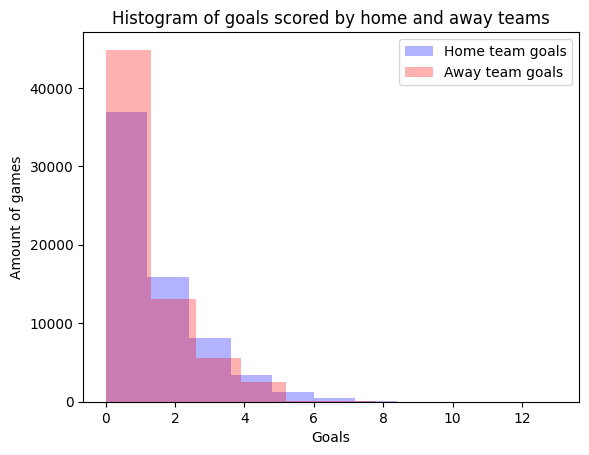

In [8]:
plt.hist(data['home_team_goal_count'], color='blue', alpha=.3)
plt.hist(data['away_team_goal_count'], color='red', alpha=.3)
plt.legend(['Home team goals', 'Away team goals'])
plt.xlabel('Goals')
plt.ylabel('Amount of games')
plt.title('Histogram of goals scored by home and away teams')
plt.show()

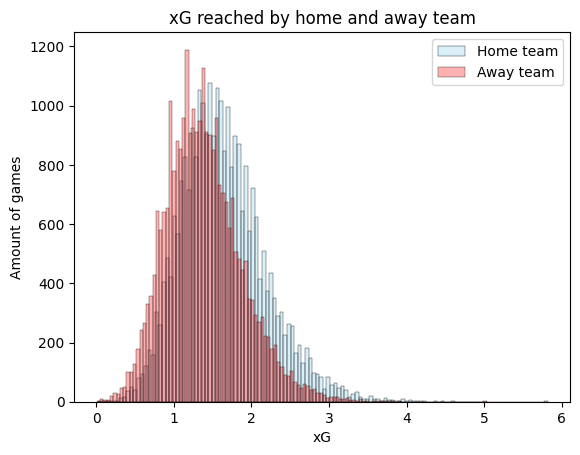

In [9]:
sns.histplot(data[data['team_a_xg'] != 0]['team_a_xg'], color='skyblue', alpha=.3)
sns.histplot(data[data['team_b_xg'] != 0]['team_b_xg'], color='red', alpha=.3)
plt.xlabel('xG')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('xG reached by home and away team')
plt.show()

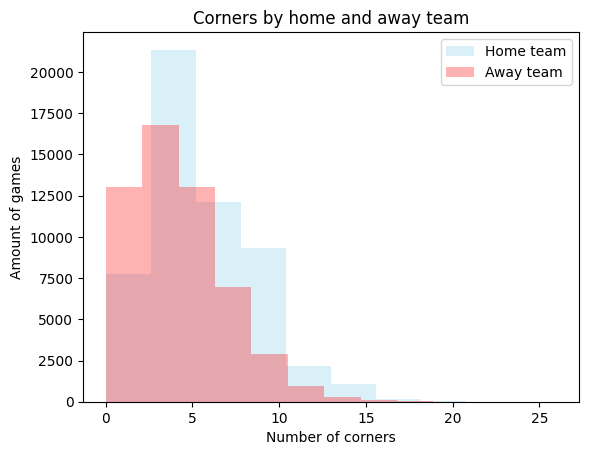

In [10]:
plt.hist(data[data['home_team_corner_count'] != -1]['home_team_corner_count'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_corner_count'] != -1]['away_team_corner_count'], color='red', alpha=.3)
plt.xlabel('Number of corners')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Corners by home and away team')
plt.show()

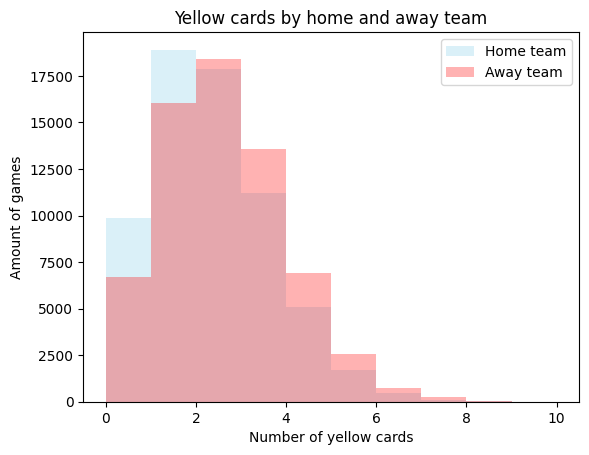

In [11]:
plt.hist(data[data['home_team_yellow_cards'] != -1]['home_team_yellow_cards'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_yellow_cards'] != -1]['away_team_yellow_cards'], color='red', alpha=.3)
plt.xlabel('Number of yellow cards')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Yellow cards by home and away team')
plt.show()

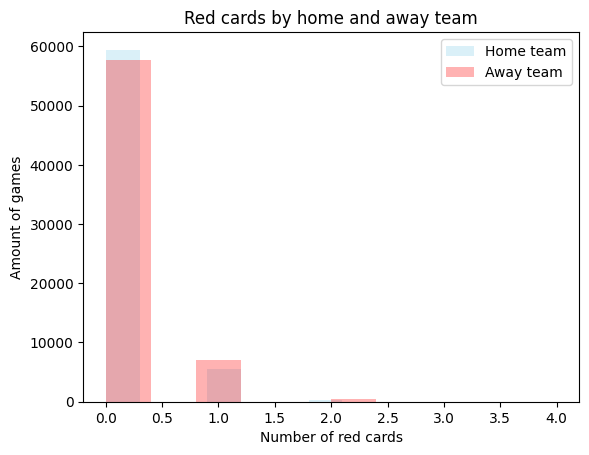

In [12]:
plt.hist(data[data['home_team_red_cards'] != -1]['home_team_red_cards'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_red_cards'] != -1]['away_team_red_cards'], color='red', alpha=.3)
plt.xlabel('Number of red cards')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Red cards by home and away team')
plt.show()

In [13]:
data['odds_ft_home_team_win'].describe(percentiles=[.9, .95, .99])

count    66080.000000
mean         2.235971
std         13.446147
min          0.000000
50%          1.740000
90%          3.750000
95%          5.350000
99%          9.990000
max        501.000000
Name: odds_ft_home_team_win, dtype: float64

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_7952\2544645493.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_7952\2544645493.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \


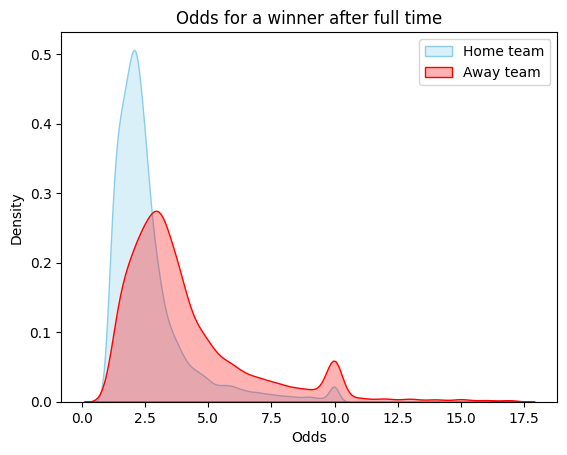

In [14]:
data['odds_ft_home_team_win'].value_counts()

sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
                            ['odds_ft_home_team_win'], color='skyblue', alpha=.3, shade=True)
sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \
                            ['odds_ft_away_team_win'], color='red', alpha=.3, shade=True)
plt.xlabel('Odds')
plt.legend(['Home team', 'Away team'])
plt.title('Odds for a winner after full time')
plt.show()

In [ ]:
sns.kdeplot(data[(data['odds_ft_draw'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
                            ['odds_ft_home_team_win'], color='skyblue', alpha=.3, shade=True)

# Correlations between discrete variables

In [55]:
from scipy.stats import kendalltau

In [57]:
vars = [
    'home_team_goal_count',
    'away_team_goal_count',
    'total_goal_count',
    'total_goal_count',
    'home_team_corner_count',
    'away_team_corner_count',
    'home_team_yellow_cards',
    'home_team_red_cards',
    'away_team_yellow_cards',
    'away_team_red_cards',
    'home_team_shots',
    'away_team_shots',
    'home_team_shots_on_target',
    'away_team_shots_on_target',
    'home_team_shots_off_target',
    'away_team_shots_off_target',
    'home_team_fouls',
    'away_team_fouls',
    'home_team_possession',
    'away_team_possession'
]

In [62]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [63]:
kendall_results = {}
for var in vars:
    p_val = kendalltau(data[var], data['result'])[1]
    kendall_results[f'{var} vs result'] = p_val
pd.DataFrame(kendall_results, index=['kendall_pval']).T

,kendall_pval
home_team_goal_count vs result,0.00000000
away_team_goal_count vs result,0.00000000
total_goal_count vs result,0.00000000
home_team_corner_count vs result,0.79726628
away_team_corner_count vs result,0.00000000
home_team_yellow_cards vs result,0.00000085
home_team_red_cards vs result,0.00000000
away_team_yellow_cards vs result,0.00000000
away_team_red_cards vs result,0.00000000
home_team_shots vs result,0.00000066


In [64]:
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,result,date,time
0,1249669800,2009-08-07 18:30:00,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.00000000,0.00000000,0.00000000,1.35000000,1.53000000,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,VOLKSWAGEN ARENA (Wolfsburg),1,2009-08-07,18:30:00
1,1249738200,2009-08-08 13:30:00,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.00000000,0.00000000,0.00000000,2.00000000,1.35000000,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Signal-Iduna-Park (Dortmund),1,2009-08-08,13:30:00
2,1249738200,2009-08-08 13:30:00,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.00000000,0.00000000,0.00000000,1.12000000,1.76000000,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Max-Morlock-Stadion (Nürnberg),2,2009-08-08,13:30:00
3,1249738200,2009-08-08 13:30:00,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.00000000,0.00000000,0.00000000,1.76000000,1.18000000,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,wohninvest WESERSTADION (Bremen),2,2009-08-08,13:30:00
4,1249738200,2009-08-08 13:30:00,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.00000000,0.00000000,0.00000000,0.53000000,0.82000000,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Olympiastadion Berlin (Berlin),1,2009-08-08,13:30:00


In [10]:
data['odds_ft_home_team_win'].value_counts()

odds_ft_home_team_win
0.00      7090
2.10       255
9.99       241
2.00       228
2.15       206
          ... 
5.76         1
67.00        1
7.62         1
251.00       1
6.91         1
Name: count, Length: 808, dtype: int64

In [17]:
data[data['odds_ft_home_team_win'] == 0]['date'].nlargest(30)

20186   2021-04-24
13774   2020-05-23
13775   2020-05-23
13776   2020-05-23
13777   2020-05-23
13778   2020-05-23
13779   2020-05-23
13780   2020-05-23
13781   2020-05-23
13782   2020-05-23
13783   2020-05-23
13764   2020-05-16
13765   2020-05-16
13766   2020-05-16
13767   2020-05-16
13768   2020-05-16
13769   2020-05-16
13770   2020-05-16
13771   2020-05-16
13772   2020-05-16
13773   2020-05-16
13754   2020-05-09
13755   2020-05-09
13756   2020-05-09
13757   2020-05-09
13758   2020-05-09
13759   2020-05-09
13760   2020-05-09
13761   2020-05-09
13762   2020-05-09
Name: date, dtype: datetime64[ns]

# Model building

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
data_clean['result'] = np.where(data_clean['home_team_goal_count'] == data_clean['away_team_goal_count'], 0, np.where(data_clean['home_team_goal_count'] > data_clean['away_team_goal_count'], 1, 2))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_6296\2921145499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['result'] = np.where(data_clean['home_team_goal_count'] == data_clean['away_team_goal_count'], 0, np.where(data_clean['home_team_goal_count'] > data_clean['away_team_goal_count'], 1, 2))


In [36]:
data_clean.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
306,1282329000,Aug 20 2010 - 6:30pm,complete,NaN,Bayern München,Wolfsburg,Thorsten Kinhöfer,1.0,0.0,0.0,2.41,1.00,2,1,3,1,1,0,"9,90'1",55,9,3,1,0,3,0,1,0,1,2,18,12,6,6,12,6,6,25,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Allianz Arena (München)
307,1282397400,Aug 21 2010 - 1:30pm,complete,NaN,Hoffenheim,Werder Bremen,Günter Perl,1.0,0.0,0.0,1.53,1.00,4,1,5,5,4,1,"20,37,41,43",4,5,5,1,0,2,0,0,1,1,1,11,11,8,3,3,8,24,16,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PreZero Arena (Sinsheim)
308,1282397400,Aug 21 2010 - 1:30pm,complete,NaN,Borussia M'gladbach,Nürnberg,Peter Gagelmann,1.0,0.0,0.0,1.06,1.06,1,1,2,2,1,1,31,15,6,5,0,0,1,0,0,0,0,1,13,11,6,6,7,5,15,18,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stadion im BORUSSIA-PARK (Mönchengladbach)
309,1282397400,Aug 21 2010 - 1:30pm,complete,NaN,Köln,Kaiserslautern,Felix Brych,1.0,0.0,0.0,2.06,1.29,1,3,4,1,1,0,8,"70,84,88",5,6,1,1,2,0,1,1,1,1,11,18,5,7,6,11,10,25,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RheinEnergieStadion (Köln)
310,1282397400,Aug 21 2010 - 1:30pm,complete,NaN,Freiburg,St. Pauli,Jochen Drees,1.0,0.0,0.0,1.53,0.82,1,3,4,0,0,0,78,"83,89,90'1",3,6,0,0,0,0,0,0,0,0,10,18,4,7,6,11,12,13,50,50,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Schwarzwald-Stadion (Freiburg im Breisgau)


In [40]:
X = data_clean[['home_ppg', 'away_ppg', 'total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_corner_count', 'away_team_corner_count',
          'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target',
          'home_team_shots_off_target', 'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession', 'team_a_xg', 'team_b_xg', 'average_goals_per_match_pre_match',
          'btts_percentage_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win']]
y = data_clean['result']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42335, 29), (10584, 29), (42335,), (10584,))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicjalizacja modelu
model = Sequential()

# Warstwa wejściowa
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Warstwa ukryta - analiza head-to-head (h2h)
model.add(Dense(64, activation='relu'))

# Dodatkowe warstwy ukryte
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Warstwa wyjściowa
# Zakładamy, że chcesz przewidzieć wiele wartości (np. wynik meczu, liczba bramek, itp.)
model.add(Dense(5, activation='linear'))  # 5 wartości wyjściowych

# Kompilacja modelu
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50


3387/3387 [==============================] - 10s 3ms/step - loss: 0.5753 - accuracy: 0.1903 - val_loss: 0.4750 - val_accuracy: 0.3002
Epoch 2/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.4536 - accuracy: 0.2204 - val_loss: 0.4279 - val_accuracy: 0.2393
Epoch 3/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.4184 - accuracy: 0.2438 - val_loss: 0.4243 - val_accuracy: 0.1532
Epoch 4/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.3468 - accuracy: 0.2474 - val_loss: 0.2929 - val_accuracy: 0.3290
Epoch 5/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.2834 - accuracy: 0.2469 - val_loss: 0.2655 - val_accuracy: 0.2951
Epoch 6/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.2720 - accuracy: 0.2393 - val_loss: 0.2615 - val_accuracy: 0.1717
Epoch 7/50
3387/3387 [==============================] - 8s 2ms/step - loss: 0.2615 - accuracy: 0.2274 - val_loss: 0.2544 - val_accura

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 18501 (72.27 KB)
Trainable params: 18501 (72.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Brudnopis

In [68]:
df = {
    'stadium_name': [
        'VOLKSWAGEN ARENA (Wolfsburg)',
        'VOLKSWAGEN ARENA',
        'AOK Stadion (Wolfsburg)',
        'AOK Stadion',
        'SIGNAL IDUNA PARK (Dortmund)',
        'SIGNAL IDUNA PARK'
    ],
    'count': [172, 91, 1, 5, 100, 50]
}


df = pd.DataFrame(df)

In [69]:
df

,stadium_name,count
0,VOLKSWAGEN ARENA (Wolfsburg),172
1,VOLKSWAGEN ARENA,91
2,AOK Stadion (Wolfsburg),1
3,AOK Stadion,5
4,SIGNAL IDUNA PARK (Dortmund),100
5,SIGNAL IDUNA PARK,50


In [70]:
# Wyodrębnienie nazw stadionów bez miasta
df['base_name'] = df['stadium_name'].str.replace(r" \(.*\)$", "", regex=True)

# Tworzenie mapy nazw z najczęściej występującym miastem w nawiasie dla każdego stadionu
city_map = df[df['stadium_name'].str.contains(r"\(.*\)")].copy()
city_map['city'] = city_map['stadium_name'].str.extract(r"\((.*?)\)")[0]
city_map = city_map.groupby('base_name')['city'].agg(pd.Series.mode).to_dict()

# Uzupełnianie miast dla nazw stadionów bez nawiasów
df['normalized_stadium'] = df.apply(lambda row: f"{row['base_name']} ({city_map.get(row['base_name'], 'Unknown')})" if '(' not in row['stadium_name'] else row['stadium_name'], axis=1)

In [72]:
df

,stadium_name,count,base_name,normalized_stadium
0,VOLKSWAGEN ARENA (Wolfsburg),172,VOLKSWAGEN ARENA,VOLKSWAGEN ARENA (Wolfsburg)
1,VOLKSWAGEN ARENA,91,VOLKSWAGEN ARENA,VOLKSWAGEN ARENA (Wolfsburg)
2,AOK Stadion (Wolfsburg),1,AOK Stadion,AOK Stadion (Wolfsburg)
3,AOK Stadion,5,AOK Stadion,AOK Stadion (Wolfsburg)
4,SIGNAL IDUNA PARK (Dortmund),100,SIGNAL IDUNA PARK,SIGNAL IDUNA PARK (Dortmund)
5,SIGNAL IDUNA PARK,50,SIGNAL IDUNA PARK,SIGNAL IDUNA PARK (Dortmund)


In [73]:
df['normalized_stadium'].value_counts()

normalized_stadium
VOLKSWAGEN ARENA (Wolfsburg)    2
AOK Stadion (Wolfsburg)         2
SIGNAL IDUNA PARK (Dortmund)    2
Name: count, dtype: int64

In [65]:
data['home_team_name'].nunique()

892